In [1]:
import pandas as pd
import numpy as np
import json
import datetime as dt
from datetime import datetime, date, time,timedelta
import pandas as pd
from csv import DictWriter
import urllib
import re,datetime
import os
import time
from os import walk
import re
import  gc
from pyxirr import xirr

############
#INPUTS
#############

index = "BANKNIFTY"
index_file_path = "E:\sourav\Dispersion\IndexFile\IndexFile_1-5_%_OTM_File\BANKNIFTY.csv"

stfolder = "E:/sourav/Dispersion/STFolder/1-5_%_OTM_Files"
    
wgt_lot_path = "E:\sourav\Dispersion\BankNiftyWeights\BN Mcap & includeok - Copy.csv"

direc = r"C:/Users/ADMIN/Desktop/Correlation Adjustments - stock + index/Working Files"

output_path = r"C:/Users/ADMIN/Desktop/Correlation Adjustments - stock + index/Output"

index_lotsize = 1

initial_equity = 100000

#########################
#Creating Stock List
#######################

filename = next(walk(stfolder), (None, None, []))[2]  # [] if no file
stock_list_path = []
for i in filename:
    temp = stfolder +"/"+ i
    stock_list_path.append(temp)

stock_list = []
for i in stock_list_path:
    stock_list.append(i.replace(".csv","").replace(stfolder + "/",""))
print(stock_list)
    
######################################    
#Creating weight and lot dictionary
######################################

"""wgtlot_df = pd.read_csv(wgt_lot_path)
wgtlot_dict = wgtlot_df.set_index('Symbol').T.to_dict('list')
print(wgtlot_dict)
symbols = list(wgtlot_dict.keys())"""

### Now adding Columns for weights below

####################################

lookback_period = 15
std_dev = 2

#################
#EXPIRY DATES
####################
symbols = stock_list.copy()
symbols.append(index)

exp_file_path = "expiry_dates.csv"
exp_df = pd.read_csv(exp_file_path,parse_dates = ["curr_exp_date","Date"],dayfirst =True,usecols = ["curr_exp_date","Date"])
#exp_df.rename({'curr_date': 'Date'}, axis=1, inplace=True)

['AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'CANBK', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'RBLBANK', 'SBIN', 'YESBANK']


In [2]:
idx = pd.read_csv(index_file_path,parse_dates = ["Date"],dayfirst = True)
df1 = idx[idx['Ticker'].str.endswith('- I')]
df2 = idx[idx['Ticker'].str.endswith('- II')]
df3 = idx[idx['Ticker'].str.endswith('- III')]



index_file_path = direc + "/BANKNIFTY.csv"

df1.to_csv(index_file_path)
df2.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"))
df3.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-III"))

print(idx.shape[0])
print(df1.shape[0]+df2.shape[0]+df3.shape[0])
    
for i in stock_list:
    df = pd.read_csv(stfolder + '/' + i + ".csv",parse_dates = ["Date"],dayfirst = True)
    df1 = df[df['Ticker'].str.endswith('- I')]
    df2 = df[df['Ticker'].str.endswith('- II')]
    df3 = df[df['Ticker'].str.endswith('- III')]
    
    path = direc + '/' + i + ".csv"
    
    df1.to_csv(path)
    df2.to_csv(path.replace(i,i+"-II"))
    df3.to_csv(path.replace(i,i+"-III"))
    
    print(df.shape[0])
    print(df1.shape[0]+df2.shape[0]+df3.shape[0])

stfolder = direc
print(index_file_path)

343290
343290
169540
169540
25538
25538
136480
136480
106465
106465
159450
159450
157490
157490
181844
181844
167624
167624
110306
110306
187784
187784
186026
186026
146610
146610
109058
109058
175724
175724
133296
133296
C:/Users/ADMIN/Desktop/Correlation Adjustments - stock + index/Working Files/BANKNIFTY.csv


In [3]:
idx = pd.read_csv(index_file_path,usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At_The_Money"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')

idx_ce = idx[(idx["Strike"] == idx["At_The_Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At_The_Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')

final.to_csv(output_path+"/check-1data.csv")

print(final)
for i in stock_list:
    print(i)
    df1 = pd.read_csv(stfolder+ '/' + i + ".csv",parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At_The_Money"])


    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')
    
    
    df_ce = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    print(df1.shape[0], df_ce.shape[0], df_pe.shape[0])
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
    
final = final.T.drop_duplicates().T
curr_final_df = final.copy()
u = curr_final_df.select_dtypes(exclude=['datetime'])
curr_final_df[u.columns] = u.fillna(0)

curr_final_df.to_csv(output_path+"/check-2data.csv")


     BANKNIFTY_Date_CE   BANKNIFTY_Ticker_CE BANKNIFTY_OPT_Close_CE  \
0           2016-01-01  BANKNIFTY17000CE - I                 369.05   
1           2016-01-04  BANKNIFTY16600CE - I                 359.55   
2           2016-01-05  BANKNIFTY16500CE - I                 376.45   
3           2016-01-06  BANKNIFTY16400CE - I                 360.95   
4           2016-01-07  BANKNIFTY16100CE - I                 348.25   
...                ...                   ...                    ...   
1228        2020-12-24  BANKNIFTY30400CE - I                  359.8   
1229        2020-12-28  BANKNIFTY30900CE - I                 309.05   
1230        2020-12-29  BANKNIFTY31300CE - I                  279.2   
1231        2020-12-30  BANKNIFTY31300CE - I                 203.85   
1232        2020-12-31  BANKNIFTY31300CE - I                   0.05   

     BANKNIFTY_Strike_CE BANKNIFTY_IV_CE BANKNIFTY_EQ_Close_CE  \
0                17000.0           0.173            17033.8008   
1              

In [4]:
idx = pd.read_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"),usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At_The_Money"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')


idx_ce = idx[(idx["Strike"] == idx["At_The_Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At_The_Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')
final.to_csv(output_path+"/check-3data.csv")

for i in stock_list:
    print(i)
    path  = stfolder+ '/' + i + ".csv"
    df1 = pd.read_csv(path.replace(i,i+"-II"),parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At_The_Money"])
    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')

    
    df_ce = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    
    
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
final = final.T.drop_duplicates().T
next_final_df = final.copy()

next_final_df.to_csv(output_path+"/check-4.0data.csv")


u = next_final_df.select_dtypes(exclude=['datetime'])
next_final_df[u.columns] = u.fillna(0)

next_final_df.to_csv(output_path+"/check-4data.csv")


AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


In [5]:
replacedf = curr_final_df[curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"]]
restdf = curr_final_df[~(curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"])]

nextdf = next_final_df[next_final_df[index + "_Date_CE"] == next_final_df[index + "_curr_exp_date_CE"]]

print(replacedf.shape[0])
print(restdf.shape[0])
print(nextdf.shape[0])
print(next_final_df.shape[0])


for i in symbols:
    if nextdf.shape[0] == replacedf.shape[0]:
        replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
        replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]
        print("EXCHANGE DONE")
    else:
        print("Entries Missing Error")
        break

final = restdf.append(replacedf).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])

60
1173
60
1233
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/4070273255.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/4070273255.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/4070273255.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [6]:
final.to_csv(output_path+"\Part-1data.csv")
data = pd.read_csv(output_path+"\Part-1data.csv",parse_dates = [index + "_Date_CE"],dayfirst = True)

In [7]:
#Adding Avg IV Columns
data[index + "_Avg IV"] = (data[index + "_IV_CE"] + data[index + "_IV_PE"])/2
curr_final_df[index + "_Avg IV"] = data[index + "_Avg IV"]
for i in stock_list:
    data[i + "_Avg IV"] = (data[i + "_IV_CE"] + data[i + "_IV_PE"])/2
    curr_final_df[i + "_Avg IV"] = data[i + "_Avg IV"]
data = curr_final_df.copy()

# Adding Weights Columns

In [8]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date","includeok","Lotsize"])

In [9]:
grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

display(data)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/2423747936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/2423747936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/2423747936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

7652
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/2423747936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]


,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,FEDERALBNK_OG_Weight,HDFCBANK_OG_Weight,ICICIBANK_OG_Weight,IDFCFIRSTB_OG_Weight,INDUSINDBK_OG_Weight,KOTAKBANK_OG_Weight,PNB_OG_Weight,RBLBANK_OG_Weight,SBIN_OG_Weight,YESBANK_OG_Weight
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,0.1730,...,0.96,26.83,14.92,NaN,5.58,13.01,2.25,NaN,17.26,3.00
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,0.2095,...,0.96,27.11,14.90,NaN,5.56,12.96,2.22,NaN,17.18,2.97
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,0.2116,...,0.97,27.03,15.03,NaN,5.59,13.07,2.19,NaN,17.03,2.99
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,0.2171,...,0.96,27.30,14.73,NaN,5.68,13.06,2.18,NaN,17.06,2.99
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,0.2334,...,0.94,27.70,14.90,NaN,5.71,13.16,2.14,NaN,16.89,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,0.2035,...,0.60,35.40,16.31,0.94,2.97,17.86,1.52,0.61,10.96,NaN
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,0.2480,...,0.61,35.25,16.26,0.95,2.97,17.84,1.54,0.62,11.13,NaN
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,0.2507,...,0.60,35.16,16.33,0.93,3.09,17.71,1.56,0.62,11.09,NaN
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,0.2497,...,0.60,35.27,16.32,0.93,3.04,17.87,1.53,0.62,11.05,NaN


### Adding Final Weight Columns

In [10]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [11]:
u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,HDFCBANK_Final_Weight,ICICIBANK_Final_Weight,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,YESBANK_Final_Weight,BANKNIFTY_Final_Weight
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,0.1730,...,0.268273,0.149185,0.000000,0.055794,0.130087,0.022498,0.000000,0.172583,0.029997,1
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,0.2095,...,0.271127,0.149015,0.000000,0.055606,0.129613,0.022202,0.000000,0.171817,0.029703,1
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,0.2116,...,0.270327,0.150315,0.000000,0.055906,0.130713,0.021902,0.000000,0.170317,0.029903,1
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,0.2171,...,0.273000,0.147300,0.000000,0.056800,0.130600,0.021800,0.000000,0.170600,0.029900,1
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,0.2334,...,0.277000,0.149000,0.000000,0.057100,0.131600,0.021400,0.000000,0.168900,0.029600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,0.2035,...,0.354000,0.163100,0.009400,0.029700,0.178600,0.015200,0.006100,0.109600,0.000000,1
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,0.2480,...,0.352465,0.162584,0.009499,0.029697,0.178382,0.015398,0.006199,0.111289,0.000000,1
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,0.2507,...,0.351635,0.163316,0.009301,0.030903,0.177118,0.015602,0.006201,0.110911,0.000000,1
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,0.2497,...,0.352735,0.163216,0.009301,0.030403,0.178718,0.015302,0.006201,0.110511,0.000000,1


In [12]:
data['index_iv'] = data[index +'_Avg IV']*100
data['stock_iv']  = 0
for i in stock_list:
    data['stock_iv'] += data[i + '_Avg IV']*data[i + "_Final_Weight"] 
    
data['implied_correl'] = (data['index_iv']/data['stock_iv'])

print(data.isnull().sum().sum())

3952


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/231026971.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['index_iv'] = data[index +'_Avg IV']*100
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/231026971.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['stock_iv']  = 0
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/231026971.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

In [13]:
data['avg'] = data['implied_correl'].rolling(lookback_period).mean()
df = data.copy()

df.to_csv(output_path+'/impliedratio.csv')

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/1487180381.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['avg'] = data['implied_correl'].rolling(lookback_period).mean()


In [14]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * std_dev # Calculate top band
    bollinger_down = sma - std * std_dev # Calculate bottom band
    return bollinger_up, bollinger_down

df['bollinger_up'], df['bollinger_down'] = get_bollinger_bands(df['implied_correl'], lookback_period)

df['sma'] = get_sma(df['implied_correl'], lookback_period)
df['long_avg'] = df['implied_correl'].mean()


#print(df['bollinger_up'])
#print(df['bollinger_down'])
#print(df['long_avg'])
#print(df['sma'])

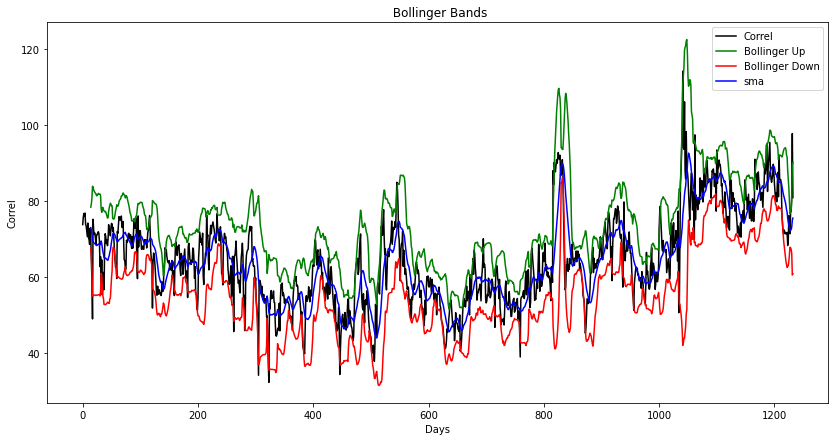

In [15]:
import matplotlib.pyplot as plt

df.head()

fig = plt.figure(figsize=(14,7))
plt.title(' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Correl')
plt.plot(df['implied_correl'], label='Correl', c = 'black')
plt.plot(df['bollinger_up'], label='Bollinger Up', c='g')
plt.plot(df['bollinger_down'], label='Bollinger Down', c='r')
plt.plot(df['sma'], label='sma', c='b')

plt.legend()
plt.show()

In [16]:
df.to_csv(output_path+"\series.csv")

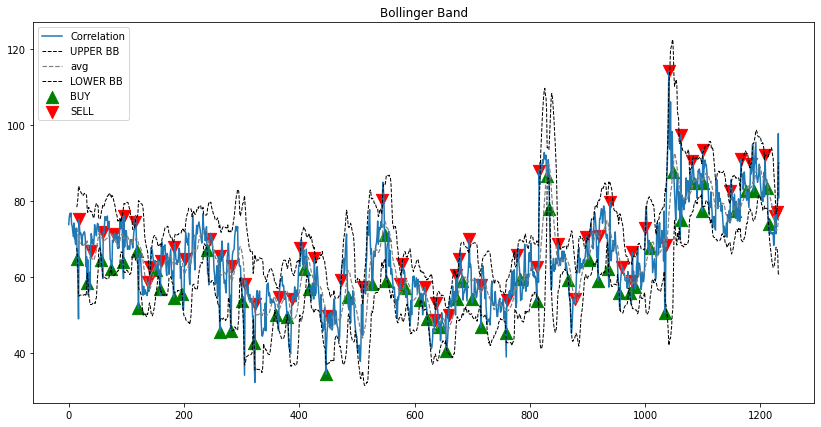

In [17]:
def implement_bb_strategy(data, lower_bb, upper_bb, avg):
    entry_ratio = []
    exit_ratio = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if(i==0):
            if data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            elif data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(0)
        else:
            if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] > avg[i-1] and data[i] < avg[i]:
                if signal != 0:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])                
            
            elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] < avg[i-1] and data[i] > avg[i]:
                if signal != 0:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(bb_signal[i-1])

    return entry_ratio, exit_ratio, bb_signal

df['entry_ratio'], df['exit_ratio'], df['bb_signal'] = implement_bb_strategy(df['implied_correl'], df['bollinger_down'], df['bollinger_up'], df['avg'])

fig = plt.figure(figsize=(14,7))


df['implied_correl'].plot(label = 'Correlation', alpha = 1)
df['bollinger_up'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['avg'].plot(label = 'avg', linestyle = '--', linewidth = 1.2, color = 'grey')
df['bollinger_down'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, df['entry_ratio'], marker = '^', color = 'green', label = 'BUY', s = 150)
plt.scatter(df.index, df['exit_ratio'], marker = 'v', color = 'red', label = 'SELL', s = 150)
plt.title('Bollinger Band')
plt.legend(loc = 'upper left')
plt.show()


In [18]:
df1 = df.copy()

In [19]:
df1['dispersion_entry'] = False #(df1['bb_signal'] == -1) & (df1['exit_ratio'] > 0)  & (df1['entry_ratio'].isna() == True)
df1['dispersion_exit'] = False #(df1['bb_signal'] == 0) & (df1['entry_ratio'] > 0) & (df1['entry_ratio'].isna() == False)

df1['correlation_entry'] = np.nan
df1['correlation_exit'] = np.nan
df1['bb_signal'] = np.nan

#df1['correlation_entry'] = (df1['bb_signal'] == 1) & (df1['entry_ratio'] > 0)  & (df1['exit_ratio'].isna() == True)
#df1['correlation_exit'] = (df1['bb_signal'] == 0)  & (df1['exit_ratio'] > 0)  & (df1['exit_ratio'].isna() == False):

df1['bb_signal'] = df1.apply(lambda x: 0 if x['BANKNIFTY_Date_CE']==x['BANKNIFTY_curr_exp_date_CE'] else 1, axis=1)



for i in range(len(df1)):
    if(i==0):
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i-1,'BANKNIFTY_Date_CE'] == df1.loc[i-1,'BANKNIFTY_curr_exp_date_CE']):  
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i,'BANKNIFTY_Date_CE'] == df1.loc[i,'BANKNIFTY_curr_exp_date_CE']):
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = True
    else:
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = False

display(df1)          
    

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,bollinger_down,sma,long_avg,entry_ratio,exit_ratio,bb_signal,dispersion_entry,dispersion_exit,correlation_entry,correlation_exit
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,0.1730,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,True,False
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,0.2095,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,False,False
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,0.2116,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,False,False
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,0.2171,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,False,False
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,0.2334,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,0.2035,...,67.627833,72.273736,64.428187,NaN,77.117174,1,False,False,False,False
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,0.2480,...,67.232562,72.495861,64.428187,NaN,NaN,1,False,False,False,False
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,0.2507,...,66.150468,73.146637,64.428187,NaN,NaN,1,False,False,False,False
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,0.2497,...,60.495897,74.910501,64.428187,NaN,NaN,1,False,False,False,False


In [20]:
df2 = df1.copy()


# df2_index = df2.index
# exp_dates = list(df2_index[df2[index + "_curr_exp_date_CE"] == df2[index+"_Date_CE"]])
# print(exp_dates)
# for i in exp_dates:
#     if df2.iloc[i]["bb_signal"] == -1:
#         df2.loc[i,'dispersion_entry'] = False
#         df2.loc[i,'dispersion_exit'] = True
#         df2.loc[i,'correlation_entry'] = False
#         df2.loc[i,'correlation_exit'] = False
#         df2.loc[i,'bb_signal'] = 0
#         df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]

#         df2.loc[i+1,'dispersion_entry'] = True
#         df2.loc[i+1,'dispersion_exit'] = False
#         df2.loc[i+1,'correlation_entry'] = False
#         df2.loc[i+1,'correlation_exit'] = False
#         df2.loc[i+1,'bb_signal'] = -1
#         df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
#     elif df2.iloc[i]["bb_signal"] == 1:
#         df2.loc[i,'dispersion_entry'] = False
#         df2.loc[i,'dispersion_exit'] = False
#         df2.loc[i,'correlation_entry'] = False
#         df2.loc[i,'correlation_exit'] = True
#         df2.loc[i,'bb_signal'] = 0
#         df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]
        
#         df2.loc[i+1,'dispersion_entry'] = False
#         df2.loc[i+1,'dispersion_exit'] = False
#         df2.loc[i+1,'correlation_entry'] = True
#         df2.loc[i+1,'correlation_exit'] = False
#         df2.loc[i+1,'bb_signal'] = 1
#         df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
        
#     elif df2.iloc[i]["bb_signal"] == 0:
#         continue
        
# df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
#               (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df2.to_csv(output_path + '/with entry exit signals_all data.csv')

In [21]:
df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
              (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df.to_csv(output_path + '/with entry exit signals.csv')

In [22]:
trades = []

for i in df.index[:-1]:
    if df["bb_signal"][i] == -1:
        strikes = {}
        strikes[index] = df[index + "_Strike_CE"][i]
        for j in stock_list:
            strikes[j] = df[j+"_Strike_CE"][i]
        trades.append( 
                        { 
                          "entry_date": df[index + "_Date_CE"][i],
                          "exit_date" : df[index + "_Date_CE"][i+1],
                          "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                          "type_of_trade": "SILS",
                          "strike" : strikes,
                          "entry_ratio" : df["exit_ratio"][i],
                          "exit_ratio" : df["entry_ratio"][i+1],
                            
                        }
                      )
                            
    if df["bb_signal"][i] == 1:
            strikes = {}
            strikes[index] = df[index + "_Strike_CE"][i]
            for j in stock_list:
                strikes[j] = df[j+"_Strike_CE"][i]
            trades.append( 
                            { 
                              "entry_date": df[index + "_Date_CE"][i],
                              "exit_date" : df[index + "_Date_CE"][i+1],
                              "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                              "type_of_trade": "LISS",
                              "strike" : strikes,
                              "entry_ratio" : df["entry_ratio"][i],
                              "exit_ratio" : df["exit_ratio"][i+1],
                            }
                          )

In [23]:
for i in trades:
    date1 = i["entry_date"]
    date2 = i["exit_date"]
    expiry = i["expiry_date"]
    print(date1)
    print(date2)
    
    if expiry == date1:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        nextdf = pd.read_csv(index_file_path.replace(index,index+"-II"),parse_dates = ["Date"])
        
        df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
        nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][index])]
        nextdf = nextdf.append(df)
        nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = nextdf

        for j in stock_list:
            path = stfolder + '/' + j + ".csv"
            df = pd.read_csv(path,parse_dates = ["Date"])
            nextdf = pd.read_csv(path.replace(j,j+"-II"),parse_dates = ["Date"])
        
            df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][j])]
            nextdf = nextdf.append(df)
            nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
            df_dict[j] = nextdf
        i["dataframes"] = df_dict
    
    else:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
        df = pd.merge(df, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = df

        for j in stock_list:
            df = pd.read_csv(stfolder + '/' + j + ".csv",parse_dates = ["Date"])
            df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            df = pd.merge(df, exp_df, on = 'Date', how = 'left')
            df_dict[j] = df
        i["dataframes"] = df_dict

2016-01-01 00:00:00
2016-01-28 00:00:00
2016-01-29 00:00:00
2016-02-25 00:00:00
2016-02-26 00:00:00
2016-03-31 00:00:00
2016-04-01 00:00:00
2016-04-28 00:00:00
2016-04-29 00:00:00
2016-05-26 00:00:00
2016-05-27 00:00:00
2016-06-30 00:00:00
2016-07-01 00:00:00
2016-07-28 00:00:00
2016-07-29 00:00:00
2016-08-25 00:00:00
2016-08-26 00:00:00
2016-09-29 00:00:00
2016-09-30 00:00:00
2016-10-27 00:00:00
2016-10-28 00:00:00
2016-11-24 00:00:00
2016-11-25 00:00:00
2016-12-29 00:00:00
2016-12-30 00:00:00
2017-01-25 00:00:00
2017-01-27 00:00:00
2017-02-23 00:00:00
2017-02-27 00:00:00
2017-03-30 00:00:00
2017-03-31 00:00:00
2017-04-27 00:00:00
2017-04-28 00:00:00
2017-05-25 00:00:00
2017-05-26 00:00:00
2017-06-29 00:00:00
2017-06-30 00:00:00
2017-07-27 00:00:00
2017-07-28 00:00:00
2017-08-31 00:00:00
2017-09-01 00:00:00
2017-09-28 00:00:00
2017-09-29 00:00:00
2017-10-26 00:00:00
2017-10-27 00:00:00
2017-11-30 00:00:00
2017-12-01 00:00:00
2017-12-28 00:00:00
2017-12-29 00:00:00
2018-01-25 00:00:00


In [24]:
for i in trades:
    print(i["dataframes"]['BANKNIFTY'].columns)

Index(['Unnamed: 0', 'Date', 'Ticker', 'OPT_Open', 'OPT_High', 'OPT_Low',
       'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike', 'Option_Type', 'IV',
       'Delta', 'Theta', 'Gamma', 'Vega', 'EQ_Open', 'EQ_High', 'EQ_Low',
       'EQ_Close', 'Ticker_Type', 'At_The_Money', 'Delta_15_Strike',
       'Delta_20_Strike', 'Delta_25_Strike', 'Delta_30_Strike',
       'Delta_35_Strike', 'Delta_40_Strike', 'Delta_45_Strike',
       'Delta_50_Strike', '1_%_OTM_Strike', '2_%_OTM_Strike', '3_%_OTM_Strike',
       '4_%_OTM_Strike', '5_%_OTM_Strike', 'curr_exp_date'],
      dtype='object')
Index(['Unnamed: 0', 'Date', 'Ticker', 'OPT_Open', 'OPT_High', 'OPT_Low',
       'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike', 'Option_Type', 'IV',
       'Delta', 'Theta', 'Gamma', 'Vega', 'EQ_Open', 'EQ_High', 'EQ_Low',
       'EQ_Close', 'Ticker_Type', 'At_The_Money', 'Delta_15_Strike',
       'Delta_20_Strike', 'Delta_25_Strike', 'Delta_30_Strike',
       'Delta_35_Strike', 'Delta_40_Strike', 'Delta_45_

In [25]:
result = pd.DataFrame()
for trade_dict in trades:
    df_dict = trade_dict["dataframes"]
    entry = trade_dict["entry_date"]
    exit = trade_dict["exit_date"]
    
    idx = df_dict[index][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date"]]
    
    idx_ce = idx[(idx["Option_Type"] == "CE")].add_suffix("_CE")
    idx_pe = idx[(idx["Option_Type"] == "PE")].add_suffix("_PE")

    final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    final = final.add_prefix(index +"_")
    
    for i in df_dict:
        if i == index:
            continue
        df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date"]]
        df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
        df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")

        temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
        temp = temp.T.drop_duplicates().T
        temp = temp.add_prefix(i +"_")
        
        final = final.merge(temp,left_on=index + '_Date_CE' , right_on= i + '_Date_CE', how = 'left')
    final["Trade_Type"] = trade_dict["type_of_trade"]
    
    conditions = [
    (final[index + '_Date_CE'] == entry),
    (final[index + '_Date_CE'] == exit),
    (final[index + '_Date_CE'] != exit) & (final[index + '_Date_CE'] != entry)]

    # create a list of the values we want to assign for each condition
    values = ['F', 'L', 'M']

    # create a new column and use np.select to assign values to it using our lists as arguments
    final['D_marker'] = np.select(conditions, values)
    result = result.append(final)
        
result = result.T.drop_duplicates().T

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: Futur

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/450914173.py:39: Futur

In [26]:
data = result.copy()

In [27]:
display(data)
data.to_csv(output_path + '/before_weigt_add_second_time.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,Trade_Type,D_marker
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.173,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5,0.173,...,4.05,148.0,0.2835,146.49,2016-01-28,YESBANK148PE - I,4.59,0.2569,LISS,F
1,2016-01-04,BANKNIFTY17000CE - I,183.95,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.1,0.2012,...,2.23,148.0,0.322,141.15,2016-01-28,YESBANK148PE - I,8.45,0.3111,LISS,M
2,2016-01-05,BANKNIFTY17000CE - I,156.4,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.0,0.1993,...,2.24,148.0,0.3204,141.54,2016-01-28,YESBANK148PE - I,8.0,0.3022,LISS,M
3,2016-01-06,BANKNIFTY17000CE - I,115.6,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.8,0.2081,...,2.01,148.0,0.3285,140.77,2016-01-28,YESBANK148PE - I,7.82,0.2419,LISS,M
4,2016-01-07,BANKNIFTY17000CE - I,59.35,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.9,0.2076,...,1.08,148.0,0.3594,135.77,2016-01-28,YESBANK148PE - I,12.6,0.3253,LISS,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2020-12-24,BANKNIFTY29600CE - I,936.8,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.4,0.2165,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,LISS,M
19,2020-12-28,BANKNIFTY29600CE - I,1360.85,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,0.3159,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,LISS,M
20,2020-12-29,BANKNIFTY29600CE - I,1770.65,29600.0,0.5328,31322.5,2020-12-31,BANKNIFTY29600PE - I,12.75,0.421,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,LISS,M
21,2020-12-30,BANKNIFTY29600CE - I,1734.05,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.2,0.5229,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,LISS,M


### Adding Weight and Lot Columns Again

In [28]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date","Lotsize"])

In [29]:


grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
data[index + "_Lotsize"] = index_lotsize
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[i + "_Lotsize"] = d1["Lotsize"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight",i+ "_Lotsize"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

data.to_csv(output_path + '/weigt_add_second_time.csv')

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/4068810293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/4068810293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_Lotsize"] = d1["Lotsize"]
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/4068810293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

28473
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/4068810293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/4068810293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_Lotsize"] = d1["Lotsize"]
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10276/4068810293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,KOTAKBANK_OG_Weight,KOTAKBANK_Lotsize,PNB_OG_Weight,PNB_Lotsize,RBLBANK_OG_Weight,RBLBANK_Lotsize,SBIN_OG_Weight,SBIN_Lotsize,YESBANK_OG_Weight,YESBANK_Lotsize
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.50,0.1730,...,13.01,1,2.25,1,0.00,0.0,17.26,1,3.00,1.0
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.10,0.2012,...,12.96,1,2.22,1,0.00,0.0,17.18,1,2.97,1.0
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.00,0.1993,...,13.07,1,2.19,1,0.00,0.0,17.03,1,2.99,1.0
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.80,0.2081,...,13.06,1,2.18,1,0.00,0.0,17.06,1,2.99,1.0
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.90,0.2076,...,13.16,1,2.14,1,0.00,0.0,16.89,1,2.96,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.40,0.2165,...,17.86,1,1.52,1,0.61,1.0,10.96,1,0.00,0.0
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,0.3159,...,17.84,1,1.54,1,0.62,1.0,11.13,1,0.00,0.0
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,BANKNIFTY29600PE - I,12.75,0.4210,...,17.71,1,1.56,1,0.62,1.0,11.09,1,0.00,0.0
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.20,0.5229,...,17.87,1,1.53,1,0.62,1.0,11.05,1,0.00,0.0


### Adding Final Weight Columns

In [30]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [31]:
filter_col = [col for col in data if col.endswith('Final_Weight')]
filter_col.remove(index + "_Final_Weight")
print(filter_col)

data[filter_col] = data[filter_col].replace(0,np.nan)

data["Min_Share_Value"] = data[filter_col].min(axis = 1)
data["Min_Share_Name"] = data[filter_col].idxmin(axis=1)
print(data["Min_Share_Value"])
print(data["Min_Share_Name"])

data[filter_col] = data[filter_col].replace(np.nan,0)

['AXISBANK_Final_Weight', 'BANDHANBNK_Final_Weight', 'BANKBARODA_Final_Weight', 'BANKINDIA_Final_Weight', 'CANBK_Final_Weight', 'FEDERALBNK_Final_Weight', 'HDFCBANK_Final_Weight', 'ICICIBANK_Final_Weight', 'IDFCFIRSTB_Final_Weight', 'INDUSINDBK_Final_Weight', 'KOTAKBANK_Final_Weight', 'PNB_Final_Weight', 'RBLBANK_Final_Weight', 'SBIN_Final_Weight', 'YESBANK_Final_Weight']
0       0.009099
1       0.009101
2       0.009301
3       0.009400
4       0.009200
          ...   
1228    0.006000
1229    0.006099
1230    0.006001
1231    0.006001
1232    0.005999
Name: Min_Share_Value, Length: 1233, dtype: float64
0        BANKINDIA_Final_Weight
1        BANKINDIA_Final_Weight
2        BANKINDIA_Final_Weight
3        BANKINDIA_Final_Weight
4        BANKINDIA_Final_Weight
                 ...           
1228    FEDERALBNK_Final_Weight
1229    FEDERALBNK_Final_Weight
1230    FEDERALBNK_Final_Weight
1231    FEDERALBNK_Final_Weight
1232    FEDERALBNK_Final_Weight
Name: Min_Share_Name, Length: 1233

In [32]:
display(data)
data.to_csv(output_path + '/before_qty_add.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,YESBANK_Final_Weight,BANKNIFTY_Final_Weight,Min_Share_Value,Min_Share_Name
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.50,0.1730,...,0.000000,0.055794,0.130087,0.022498,0.000000,0.172583,0.029997,1,0.009099,BANKINDIA_Final_Weight
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.10,0.2012,...,0.000000,0.055606,0.129613,0.022202,0.000000,0.171817,0.029703,1,0.009101,BANKINDIA_Final_Weight
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.00,0.1993,...,0.000000,0.055906,0.130713,0.021902,0.000000,0.170317,0.029903,1,0.009301,BANKINDIA_Final_Weight
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.80,0.2081,...,0.000000,0.056800,0.130600,0.021800,0.000000,0.170600,0.029900,1,0.009400,BANKINDIA_Final_Weight
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.90,0.2076,...,0.000000,0.057100,0.131600,0.021400,0.000000,0.168900,0.029600,1,0.009200,BANKINDIA_Final_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.40,0.2165,...,0.009400,0.029700,0.178600,0.015200,0.006100,0.109600,0.000000,1,0.006000,FEDERALBNK_Final_Weight
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,0.3159,...,0.009499,0.029697,0.178382,0.015398,0.006199,0.111289,0.000000,1,0.006099,FEDERALBNK_Final_Weight
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,BANKNIFTY29600PE - I,12.75,0.4210,...,0.009301,0.030903,0.177118,0.015602,0.006201,0.110911,0.000000,1,0.006001,FEDERALBNK_Final_Weight
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.20,0.5229,...,0.009301,0.030403,0.178718,0.015302,0.006201,0.110511,0.000000,1,0.006001,FEDERALBNK_Final_Weight


In [33]:
#ADDING QTYS
result = data.copy()
min_exp = []
for idi, row in result.iterrows():
    min_share_stock = row['Min_Share_Name'].replace("_Final_Weight","")
    #print(min_share_stock)
    value  = row[min_share_stock + "_EQ_Close_CE"]*row[min_share_stock + "_Lotsize"]
    min_exp.append(value)
    
result["MinExp"] = min_exp
result[index + "_exp"] = (result["MinExp"]/result["Min_Share_Value"])
#result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"])).astype(int)
result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"]))
result[index + "_qty"] = result[index + "_lot"]*result[index + "_Lotsize"]

result.to_csv(output_path + '/resultt.csv')

#for stocks with includeok=0, making '_Lotsize' & '_EQ_Close_CE' non-zero

filter_col_Lotsize = [col for col in result if col.endswith('_Lotsize')]
filter_col_Lotsize.remove(index + "_Lotsize")
print(filter_col_Lotsize)
result[filter_col_Lotsize] = result[filter_col_Lotsize].replace(0,1)


filter_col_EQ_Close = [col for col in result if col.endswith('_EQ_Close_CE')]
filter_col_EQ_Close.remove(index + "_EQ_Close_CE")
print(filter_col_EQ_Close)
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(0,1)

result['index_exp'] = result[index + "_exp"]

result.to_csv(output_path + '/resulttcheckcheck.csv')

result['stock_exp'] = 0

for i in stock_list:
    print(i)
    if(i==min_share_stock):
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = result["MinExp"]
        result[i  + "_lot"] = 1
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        
    else:
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = (result[index + "_exp"]*result[i + "_Final_Weight"])
#         result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"])).astype(int)
        result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"]))
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]


filter_col_EQ_Close = [col for col in result if col.endswith('_EQ_Close_CE')]
filter_col_EQ_Close.remove(index + "_EQ_Close_CE")
print(filter_col_EQ_Close)
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(1,0)


['AXISBANK_Lotsize', 'BANDHANBNK_Lotsize', 'BANKBARODA_Lotsize', 'BANKINDIA_Lotsize', 'CANBK_Lotsize', 'FEDERALBNK_Lotsize', 'HDFCBANK_Lotsize', 'ICICIBANK_Lotsize', 'IDFCFIRSTB_Lotsize', 'INDUSINDBK_Lotsize', 'KOTAKBANK_Lotsize', 'PNB_Lotsize', 'RBLBANK_Lotsize', 'SBIN_Lotsize', 'YESBANK_Lotsize']
['AXISBANK_EQ_Close_CE', 'BANDHANBNK_EQ_Close_CE', 'BANKBARODA_EQ_Close_CE', 'BANKINDIA_EQ_Close_CE', 'CANBK_EQ_Close_CE', 'FEDERALBNK_EQ_Close_CE', 'HDFCBANK_EQ_Close_CE', 'ICICIBANK_EQ_Close_CE', 'IDFCFIRSTB_EQ_Close_CE', 'INDUSINDBK_EQ_Close_CE', 'KOTAKBANK_EQ_Close_CE', 'PNB_EQ_Close_CE', 'RBLBANK_EQ_Close_CE', 'SBIN_EQ_Close_CE', 'YESBANK_EQ_Close_CE']
AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK
['AXISBANK_EQ_Close_CE', 'BANDHANBNK_EQ_Close_CE', 'BANKBARODA_EQ_Close_CE', 'BANKINDIA_EQ_Close_CE', 'CANBK_EQ_Close_CE', 'FEDERALBNK_EQ_Close_CE', 'HDFCBANK_EQ_Close_CE', 'ICICIBANK_EQ_Close_CE', 'IDFCFIR

In [34]:
result['total_exposure'] = (result['index_exp'] + result['stock_exp'])*2

conditions = [
    (result["Trade_Type"] == "LISS"),
    (result["Trade_Type"] == "SILS")]

values = [result['total_exposure']/10,result['total_exposure']/10]
result['margin'] = np.select(conditions, values)

result['units'] = (initial_equity/result['margin']).astype(int)

result.to_csv(output_path+"/final2.csv")

In [35]:
conditions = [
    (result["D_marker"] == "F"),
    (result["D_marker"] != "F")]

values = [result[index + "_qty"]*result['units'],np.nan]
result[index + '_qty_final'] = np.select(conditions, values)

for i in stock_list:
    values = [result[i + "_qty"]*result['units'],np.nan]
    result[i + '_qty_final'] = np.select(conditions, values)

In [36]:
result = result.ffill()

In [37]:
display(result)

result.to_csv(output_path + "/final3.csv")

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,FEDERALBNK_qty_final,HDFCBANK_qty_final,ICICIBANK_qty_final,IDFCFIRSTB_qty_final,INDUSINDBK_qty_final,KOTAKBANK_qty_final,PNB_qty_final,RBLBANK_qty_final,SBIN_qty_final,YESBANK_qty_final
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.50,0.1730,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.10,0.2012,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.00,0.1993,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.80,0.2081,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.90,0.2076,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.40,0.2165,...,23.0,63.427075,79.492646,65.283616,8.706131,22.798431,108.318107,6.891535,102.736499,0.000000
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,0.3159,...,23.0,63.427075,79.492646,65.283616,8.706131,22.798431,108.318107,6.891535,102.736499,0.000000
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,BANKNIFTY29600PE - I,12.75,0.4210,...,23.0,63.427075,79.492646,65.283616,8.706131,22.798431,108.318107,6.891535,102.736499,0.000000
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.20,0.5229,...,23.0,63.427075,79.492646,65.283616,8.706131,22.798431,108.318107,6.891535,102.736499,0.000000


In [38]:
display(curr_final_df)
display(next_final_df)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,FEDERALBNK_Avg IV,HDFCBANK_Avg IV,ICICIBANK_Avg IV,IDFCFIRSTB_Avg IV,INDUSINDBK_Avg IV,KOTAKBANK_Avg IV,PNB_Avg IV,RBLBANK_Avg IV,SBIN_Avg IV,YESBANK_Avg IV
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,0.1730,...,0.30620,0.15555,0.26930,0.00000,0.24855,0.21315,0.33390,0.00000,0.25755,0.27020
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,0.2095,...,0.36960,0.17230,0.31225,0.00000,0.26550,0.24695,0.38005,0.00000,0.30815,0.32965
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,0.2116,...,0.31395,0.16940,0.29980,0.00000,0.25615,0.24295,0.39805,0.00000,0.30980,0.33320
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,0.2171,...,0.42875,0.16935,0.32210,0.00000,0.25805,0.24090,0.39395,0.00000,0.32130,0.34360
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,0.2334,...,0.40900,0.18535,0.35120,0.00000,0.28285,0.26790,0.42635,0.00000,0.34460,0.36970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,0.2035,...,0.40945,0.20355,0.25105,0.40295,0.46920,0.23615,0.48040,0.47280,0.31670,0.00000
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,0.2480,...,0.55125,0.26450,0.32570,0.52355,0.57625,0.31845,0.71480,0.64055,0.38690,0.00000
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,0.2507,...,0.50970,0.23405,0.35410,0.51765,0.64075,0.28285,0.60760,0.62505,0.40090,0.00000
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,0.2497,...,0.49395,0.23165,0.30010,0.41725,0.37230,0.25805,0.45110,0.61235,0.30985,0.00000


,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,YESBANK_Date_CE,YESBANK_Ticker_CE,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE
0,2016-01-01,BANKNIFTY17000CE - II,536.00,17000.0,0.1722,17033.8008,2016-01-28,BANKNIFTY17000PE - II,367.15,0.1692,...,2016-01-01,YESBANK148CE - II,6.30,148.0,0.2868,146.49,2016-01-28,YESBANK148PE - II,6.16,0.2630
1,2016-01-04,BANKNIFTY16600CE - II,603.65,16600.0,0.2207,16590.1504,2016-01-28,BANKNIFTY16600PE - II,429.50,0.1938,...,2016-01-04,YESBANK140CE - II,8.09,140.0,0.3313,141.15,2016-01-28,YESBANK140PE - II,5.47,0.3082
2,2016-01-05,BANKNIFTY16500CE - II,570.00,16500.0,0.1984,16545.1504,2016-01-28,BANKNIFTY16500PE - II,427.60,0.2055,...,2016-01-05,YESBANK140CE - II,8.05,140.0,0.3221,141.54,2016-01-28,YESBANK140PE - II,5.06,0.2988
3,2016-01-06,BANKNIFTY16400CE - II,580.45,16400.0,0.2098,16431.6992,2016-01-28,BANKNIFTY16400PE - II,381.00,0.1863,...,2016-01-06,YESBANK140CE - II,7.35,140.0,0.3132,140.77,2016-01-28,YESBANK140PE - II,5.16,0.2903
4,2016-01-07,BANKNIFTY16100CE - II,577.30,16100.0,0.2321,16060.7002,2016-01-28,BANKNIFTY16100PE - II,443.20,0.2039,...,2016-01-07,YESBANK136CE - II,7.23,136.0,0.3488,135.77,2016-01-28,YESBANK136PE - II,6.11,0.3264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - II,1059.05,30400.0,0.2630,30402.1992,2020-12-31,BANKNIFTY30400PE - II,936.25,0.2696,...,NaT,0,0.00,0.0,0.0000,0.00,NaT,0,0.00,0.0000
1229,2020-12-28,BANKNIFTY30900CE - II,1048.70,30900.0,0.2772,30880.9492,2020-12-31,BANKNIFTY30900PE - II,947.40,0.2801,...,NaT,0,0.00,0.0,0.0000,0.00,NaT,0,0.00,0.0000
1230,2020-12-29,BANKNIFTY31300CE - II,1038.40,31300.0,0.2694,31322.5000,2020-12-31,BANKNIFTY31300PE - II,909.50,0.2755,...,NaT,0,0.00,0.0,0.0000,0.00,NaT,0,0.00,0.0000
1231,2020-12-30,BANKNIFTY31300CE - II,1033.50,31300.0,0.2762,31303.0508,2020-12-31,BANKNIFTY31300PE - II,916.35,0.2790,...,NaT,0,0.00,0.0,0.0000,0.00,NaT,0,0.00,0.0000


# Adjustments Starts Here

In [39]:
result1 = pd.read_csv(output_path + "/final3.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

index_file_path = direc + "/BANKNIFTY.csv"

final = pd.DataFrame()


df1 = pd.read_csv(index_file_path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                "OPT_Close","At_The_Money",'EQ_Close'], dayfirst = True)

df_ce = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE").add_prefix("Current_")
df_pe = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE").add_prefix("Current_")

final = df_ce.merge(df_pe, left_on='Current_Date_CE', right_on='Current_Date_PE').drop(columns = ["Current_Option_Type_PE","Current_Option_Type_CE"])
final = final.T.drop_duplicates().T
final = final.add_prefix(index +"_")


for i in stock_list:
    print(i)
    path  = direc+ '/' + i + ".csv"
    df1 = pd.read_csv(path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","At_The_Money",'EQ_Close'], dayfirst = True)

    df_ce = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE").add_prefix("Current_")
    df_pe = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE").add_prefix("Current_")
    
    temp = df_ce.merge(df_pe, left_on='Current_Date_CE', right_on='Current_Date_PE').drop(columns = ["Current_Option_Type_PE","Current_Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    final = final.merge(temp,how='left',left_on=index + '_Current_Date_CE', right_on= i + '_Current_Date_CE').drop(columns = [i + "_Current_Date_CE"])
final = final.T.drop_duplicates().T

final[index+'_Date_CE'] = final["BANKNIFTY_Current_Date_CE"]

result1 = result1.merge(final, how = "left", on = index+'_Date_CE')
result1.to_csv(output_path+"/final3.1.csv")
display(result1)


AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


,Unnamed: 0,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,SBIN_Current_Strike_CE,SBIN_Current_EQ_Close_CE,SBIN_Current_Ticker_PE,SBIN_Current_OPT_Close_PE,YESBANK_Current_Ticker_CE,YESBANK_Current_OPT_Close_CE,YESBANK_Current_Strike_CE,YESBANK_Current_EQ_Close_CE,YESBANK_Current_Ticker_PE,YESBANK_Current_OPT_Close_PE
0,0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.50,...,230.0,227.8,SBIN230PE - I,6.95,YESBANK148CE - I,4.05,148.0,146.49,YESBANK148PE - I,4.59
1,1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,BANKNIFTY17000PE - I,550.10,...,220.0,220.7,SBIN220PE - I,6.2,YESBANK140CE - I,5.4,140.0,141.15,YESBANK140PE - I,4.14
2,2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,BANKNIFTY17000PE - I,572.00,...,220.0,217.75,SBIN220PE - I,7.45,YESBANK140CE - I,5.72,140.0,141.54,YESBANK140PE - I,3.78
3,3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,BANKNIFTY17000PE - I,658.80,...,215.0,216.85,SBIN215PE - I,5.65,YESBANK140CE - I,5.27,140.0,140.77,YESBANK140PE - I,4.2
4,4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,BANKNIFTY17000PE - I,947.90,...,210.0,209.55,SBIN210PE - I,7.0,YESBANK136CE - I,4.93,136.0,135.77,YESBANK136PE - I,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,BANKNIFTY29600PE - I,86.40,...,265.0,266.85,SBIN265PE - I,3.5,NaN,NaN,NaN,NaN,NaN,NaN
1229,1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,BANKNIFTY29600PE - I,25.75,...,275.0,275.2,SBIN275PE - I,3.4,NaN,NaN,NaN,NaN,NaN,NaN
1230,1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,BANKNIFTY29600PE - I,12.75,...,280.0,277.9,SBIN280PE - I,4.3,NaN,NaN,NaN,NaN,NaN,NaN
1231,1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,BANKNIFTY29600PE - I,6.20,...,275.0,276.9,SBIN275PE - I,1.0,NaN,NaN,NaN,NaN,NaN,NaN


# Trigger Adjustment

In [43]:
trigger = [50,75,100,125,150,175,200]
import warnings
warnings.filterwarnings("ignore")

for t in trigger:
    print("trigger :", t)

    print("Generating trigger Signals.....", datetime.datetime.now())
    result1 = pd.read_csv(output_path + "/final3.1.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    for idi, row in result1.iterrows():
        if row["D_marker"] == "F":

            result1.loc[idi, index + 'total_premium'] = result1.loc[idi, index + '_OPT_Close_CE'] + result1.loc[idi, index + "_OPT_Close_PE"]

            for i in stock_list:
                result1.loc[idi, i + "D_marker_1"] = "F"
                result1.loc[idi+1:, i + 'D_marker_1'] = "M"
                result1.loc[idi, i + "D_marker_2"] = "F"
                result1.loc[idi+1:, i + "D_marker_2"] = "M"

                result1.loc[idi, i + 'total_premium'] = result1.loc[idi, i + '_Current_OPT_Close_CE'] + result1.loc[idi, i + "_Current_OPT_Close_PE"]
                result1.loc[idi, i + 'stop_trigger_CE'] = result1.loc[idi, i + '_Current_Strike_CE'] + (t*(result1.loc[idi, i + 'total_premium'])/100)
                result1.loc[idi, i + 'stop_trigger_PE'] = result1.loc[idi, i + '_Current_Strike_CE'] - (t*(result1.loc[idi, i + 'total_premium'])/100)
                result1.loc[idi+1:, i + 'stop_trigger_CE'] = np.nan
                result1.loc[idi+1:, i + 'stop_trigger_PE'] = np.nan

            result1 = result1.ffill()



        else:
            for i in stock_list:

                if result1.loc[idi, "D_marker"] == "L":
                    result1.loc[idi, i + "D_marker_1"] = "L"
                    result1.loc[idi, i + "D_marker_2"] = "L"


                else:

                    if result1.loc[idi, i + 'stop_trigger_CE'] <= result1.loc[idi, i + '_Current_EQ_Close_CE']:
                        result1.loc[idi, i + "D_marker_1"] = "L"
                        result1.loc[idi, i + "D_marker_2"] = "F"

                        result1.loc[idi, i + 'total_premium'] = result1.loc[idi, i + '_Current_OPT_Close_CE'] + result1.loc[idi, i + "_Current_OPT_Close_PE"]
                        result1.loc[idi, i + 'stop_trigger_CE'] = result1.loc[idi, i + '_EQ_Close_CE'] + (t*(result1.loc[idi, i + 'total_premium'])/100)
                        result1.loc[idi, i + 'stop_trigger_PE'] = result1.loc[idi, i + '_EQ_Close_CE'] - (t*(result1.loc[idi, i + 'total_premium'])/100)
                        result1.loc[idi+1:, i + 'stop_trigger_CE'] = np.nan
                        result1.loc[idi+1:, i + 'stop_trigger_PE'] = np.nan


                    if result1.loc[idi, i + 'stop_trigger_PE'] >= result1.loc[idi, i + '_Current_EQ_Close_CE']:
                        result1.loc[idi, i + "D_marker_1"] = "L"
                        result1.loc[idi, i + "D_marker_2"] = "F"

                        result1.loc[idi, i + 'total_premium'] = result1.loc[idi, i + '_Current_OPT_Close_CE'] + result1.loc[idi, i + "_Current_OPT_Close_PE"]
                        result1.loc[idi, i + 'stop_trigger_CE'] = result1.loc[idi, i + '_EQ_Close_CE'] + (t*(result1.loc[idi, i + 'total_premium'])/100)
                        result1.loc[idi, i + 'stop_trigger_PE'] = result1.loc[idi, i + '_EQ_Close_CE'] - (t*(result1.loc[idi, i + 'total_premium'])/100)
                        result1.loc[idi+1:, i + 'stop_trigger_CE'] = np.nan
                        result1.loc[idi+1:, i + 'stop_trigger_PE'] = np.nan

                    result1 = result1.ffill()


    #display(result1)      

    result1.to_csv(output_path + "/final3.2__" + str(t) + ".csv")
    
#################################################################################################################

    print("Generating Stock TradeList.....", datetime.datetime.now())

    trades = []
    for j in stock_list:
#        print(j)
        df = result1[(result1[j + "D_marker_1"] == "F") | (result1[j + "D_marker_1"] == "L")].reset_index()
        #display(df)

        for i in df.index[:-1]:
            if df[j + "D_marker_2"][i] == "F":
                strikes = {}
                #strikes[index + j] = df[index + "_Current_Strike_CE"][i]
                strikes[j] = df[j+"_Current_Strike_CE"][i]
                trades.append( 
                                { 
                                  "symbol" : j,
                                  j + "_entry_date": df[index + "_Date_CE"][i],
                                  j + "_exit_date" : df[index + "_Date_CE"][i+1],
                                  "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                                  "new_month_date" : df[index+"_curr_exp_date_CE"][i+1],
                                  "strike" : strikes,
                                  "marker_1" : df[j + "D_marker_1"][i],
                                  "marker_2" : df[j + "D_marker_2"][i],

                                }
                              )

##################################################################################################################


    df_dum = pd.DataFrame()

    df_dum['Date'] = result1['BANKNIFTY_Date_CE']

    for j in stock_list:
#        print(j)
        path = direc + '/' + j + ".csv"
        for i in trades:
            symbol = i["symbol"]
            if j == symbol:
#                 print("####################",j)
                date1 = i[j + "_entry_date"]
                date2 = i[j + "_exit_date"]
                expiry = i["expiry_date"]
                new_month_date = i["new_month_date"]
                marker_1 = i["marker_1"]
                marker_2 = i["marker_2"]
#                 print(date1)
#                 print(date2)
#                 print(i["strike"][j])

                if ((marker_1 == "F") & (marker_2 == "F")):       #new trade data from same row
                    df_dict = {}

                    df = pd.read_csv(path,parse_dates = ["Date"], dayfirst = True)

                    df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
                    df = pd.merge(df_dum, df, on = 'Date', how = 'left')


                    df_dict[j] = df
                    i["dataframes"] = df_dict

                elif (marker_1 == "L") & (marker_2 == "F"):     #new trade data from next row

                    df_dict = {}

                    df = pd.read_csv(path,parse_dates = ["Date"], dayfirst = True)

                    df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
                    df = pd.merge(df_dum, df, on = 'Date', how = 'left')

                    df_dict[j] = df
                    i["dataframes"] = df_dict



    result = pd.read_csv(output_path + "/final3.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    result1 = pd.DataFrame()
    result1[index + "_Date_CE"] = result[index + "_Date_CE"]

    for j in stock_list:
#        print("j", j)
        final = pd.DataFrame()

        for trade_dict in trades:
            df_dict = trade_dict["dataframes"]

            for i in df_dict:

                    if (i != j):
                        continue

                    df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close"]]
                    df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
                    df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")
                    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
                    temp = temp.drop_duplicates()
                    temp = temp.T.drop_duplicates().T
                    temp = temp.add_prefix(i +"_new_") 
                    temp[i + '_new_Date_CE'] = pd.to_datetime(temp[i + '_new_Date_CE'])
                    final = final.append(temp)


        result1 = result1.merge(final,left_on=index + '_Date_CE' , right_on= j + '_new_Date_CE', how = 'left')

    result1 = result1.T.drop_duplicates().T    
    result1.to_csv(output_path + "/final3.3__" + str(t) + ".csv")
#    display(result1)      




    result1 = pd.read_csv(output_path + "/final3.2__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)
    result2 = pd.read_csv(output_path + "/final3.3__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)


    result = result1.merge(result2,how='left',on=index+'_Date_CE')

    result.to_csv(output_path + "/final4__" + str(t) + ".csv")
#     display(result)

##############################################################################################################

#    result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    df1 = pd.read_csv(index_file_path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","At_The_Money",'EQ_Close'], dayfirst = True)


    for i in stock_list:
        result[index + i + 'D_marker_1'] = result[i + 'D_marker_1']
        result[index + i + 'D_marker_2'] = result[i + 'D_marker_2']




    print("Generating Index TradeList.....", datetime.datetime.now())

    result1 = result.copy()
    trades = []
    for j in stock_list:
#        print(j)
        df = result1[(result1[index + j + "D_marker_1"] == "F") | (result1[index + j + "D_marker_1"] == "L")].reset_index()
        #display(df)

        for i in df.index[:-1]:
            if df[j + "D_marker_2"][i] == "F":
                strikes = {}
                strikes[index + j] = df[index + "_Current_Strike_CE"][i]
                trades.append( 
                                { 
                                  "symbol" : j,
                                  index + j + "_entry_date": df[index + "_Date_CE"][i],
                                  index + j + "_exit_date" : df[index + "_Date_CE"][i+1],
                                  "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                                  "new_month_date" : df[index+"_curr_exp_date_CE"][i+1],
                                  "strike" : strikes,
                                  "index_marker_1" : df[index + j + "D_marker_1"][i],
                                  "index_marker_2" : df[index + j + "D_marker_2"][i],

                                }
                              )




    df_dum = pd.DataFrame()

    df_dum['Date'] = result1['BANKNIFTY_Date_CE']

    for j in stock_list:
#        print(j)

        for i in trades:
            symbol = i["symbol"]
            if j == symbol:
#                 print("####################",j)
                date1 = i[index + j + "_entry_date"]
                date2 = i[index + j + "_exit_date"]
                expiry = i["expiry_date"]
                new_month_date = i["new_month_date"]
                marker_1 = i["index_marker_1"]
                marker_2 = i["index_marker_2"]
#                 print(date1)
#                 print(date2)
#                 print(i["strike"][index + j])

                if ((marker_1 == "F") & (marker_2 == "F")):       #new trade data from same row
                    df_dict = {}

                    df = pd.read_csv(index_file_path,parse_dates = ["Date"], dayfirst = True)

                    df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index + j])]
                    df = pd.merge(df_dum, df, on = 'Date', how = 'left')


                    df_dict[j] = df
                    i["dataframes"] = df_dict

                elif (marker_1 == "L") & (marker_2 == "F"):     #new trade data from next row

                    df_dict = {}

                    df = pd.read_csv(index_file_path,parse_dates = ["Date"], dayfirst = True)

                    df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index + j])]
                    df = pd.merge(df_dum, df, on = 'Date', how = 'left')

                    df_dict[j] = df
                    i["dataframes"] = df_dict




#    result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    result1 = pd.DataFrame()
    result1[index + "_Date_CE"] = result[index + "_Date_CE"]

    for j in stock_list:
#        print("j", j)
        final = pd.DataFrame()

        for trade_dict in trades:
            df_dict = trade_dict["dataframes"]

            for i in df_dict:

                    if (i != j):
                        continue

                    df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close"]]
                    df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
                    df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")
                    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
                    temp = temp.drop_duplicates()
                    temp = temp.T.drop_duplicates().T
                    temp = temp.add_prefix(index + i +"_new_") 
                    #temp[i + '_new_Date_CE'] = pd.to_datetime(temp[i + '_new_Date_CE'])
                    final = final.append(temp)


        result1 = result1.merge(final,left_on=index + '_Date_CE' , right_on= index + j + '_new_Date_CE', how = 'left')

    result1 = result1.T.drop_duplicates().T    
    result1.to_csv(output_path + "/final4.3__" + str(t) + ".csv")
#        display(result1)      

#        result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)


    result = result.merge(result1,how='left',on=index+'_Date_CE')

    result.to_csv(output_path + "/final4.4__" + str(t) + ".csv")
#        display(result)


    print("Calculating PnL.....",datetime.datetime.now())

    #result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    u = result.select_dtypes(exclude=['datetime'])
    result[u.columns] = u.fillna(0)


    plvalue = []
    pl = 0
    transaction_cost = 0

    for idi, row in result.iterrows():
        pval = 0
        if row["D_marker"] == "F":
            transaction_cost = 0

            result.loc[idi, 'pl_check'] = pl + initial_equity
            result.loc[idi+1:, 'pl_check'] = np.nan

            result.loc[idi , 'units_new'] = ((result.loc[idi ,'pl_check'])/result.loc[idi, 'margin'])
            result.loc[idi+1: , 'units_new'] = np.nan

            result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
            result.loc[idi+1:, index + '_qty_final'] = np.nan

            result.loc[idi, 'plvalue_' + index] = 0

            contract_value = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] + result.loc[idi, index + "_OPT_Close_PE"])


            for i in stock_list:                                                                    
                result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']
                result.loc[idi+1:, i + '_qty_final'] = np.nan
                result.loc[idi, i + 'new_Final_Weight'] = result.loc[idi, i + "_Final_Weight"]
                result.loc[idi+1:, i + 'new_Final_Weight'] = np.nan                
                result.loc[idi, index+i+'_qty'] = result.loc[idi, index+'_qty_final']*result.loc[idi, i + "_Final_Weight"]
                result.loc[idi+1:, index+i+'_qty'] = np.nan

                result.loc[idi, 'plvalue_' + i] = 0

                contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] + result.loc[idi, i + "_OPT_Close_PE"])

            result.loc[idi, 'transaction_cost'] = transaction_cost
            result = result.ffill()


        else:

                if row["Trade_Type"] == "SILS":
#                     plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
#                     plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
#                     pval = plvalce + plvalpe

#                     result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

                    for i in stock_list:

                        if result.loc[idi-1,i+"D_marker_2"] == "F":

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] - result.loc[idi-1, i + "_Current_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_PE"] - result.loc[idi-1, i + "_Current_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

                            plvalce = result.loc[idi, index + i + "_qty"]*(result.loc[idi-1, index + "_Current_OPT_Close_CE"] - result.loc[idi, index + i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, index + i + "_qty"]*(result.loc[idi-1, index + "_Current_OPT_Close_PE"] - result.loc[idi, index + i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, index + 'plvalue_' + i] = plvalce + plvalpe 

                        else:

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] - result.loc[idi-1, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_PE"] - result.loc[idi-1, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe

                            plvalce = result.loc[idi, index + i + "_qty"]*(result.loc[idi-1, index + i + "_new_OPT_Close_CE"] - result.loc[idi, index + i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, index + i + "_qty"]*(result.loc[idi-1, index + i + "_new_OPT_Close_PE"] - result.loc[idi, index + i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, index + 'plvalue_' + i] = plvalce + plvalpe

                        if ((result.loc[idi, i+"D_marker_1"] == "L") & (result.loc[idi, i+"D_marker_2"] == "F")):

                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Current_OPT_Close_CE"] + result.loc[idi, i + "_Current_OPT_Close_PE"])

                            contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] + result.loc[idi, index + i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + "_Current_OPT_Close_CE"] + result.loc[idi, index + "_Current_OPT_Close_PE"])

                if row["Trade_Type"] == "LISS":
#                     plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
#                     plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
#                     pval = plvalce + plvalpe

#                     result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

                    for i in stock_list:
                        if result.loc[idi-1,i+"D_marker_2"] == "F":
                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Current_OPT_Close_CE"] - result.loc[idi, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Current_OPT_Close_PE"] - result.loc[idi, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

                            plvalce = result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] - result.loc[idi-1, index + "_Current_OPT_Close_CE"])
                            plvalpe = result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_PE"] - result.loc[idi-1, index + "_Current_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, index + 'plvalue_' + i] = plvalce + plvalpe 

                        else:

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_new_OPT_Close_CE"] - result.loc[idi, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_new_OPT_Close_PE"] - result.loc[idi, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

                            plvalce = result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] - result.loc[idi-1, index + i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_PE"] - result.loc[idi-1, index + i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, index + 'plvalue_' + i] = plvalce + plvalpe

                        if ((result.loc[idi, i+"D_marker_1"] == "L") & (result.loc[idi, i+"D_marker_2"] == "F")):

                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Current_OPT_Close_CE"] + result.loc[idi, i + "_Current_OPT_Close_PE"])

                            contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] + result.loc[idi, index + i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + "_Current_OPT_Close_CE"] + result.loc[idi, index + "_Current_OPT_Close_PE"])


                pl += pval


        if row['D_marker'] == "L":

#            contract_value += result.loc[idi-1, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] + result.loc[idi-1, index + "_OPT_Close_PE"])

            for i in stock_list:                                                                    
                contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] + result.loc[idi, i + "_OPT_Close_PE"])
                contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])

            transaction_cost = contract_value*0.005
            pl = pl - transaction_cost
            result.loc[idi, 'transaction_cost'] = transaction_cost

        plvalue.append(pval)

    result["Daily_PL"] = plvalue

    #result.to_csv(output_path+"\pl_final4.csv")


    result.loc[0,'Daily_PL'] = initial_equity
    result["PortfolioValue"] = (result["Daily_PL"] - result["transaction_cost"]).cumsum()
    result.loc[0,'Daily_PL'] = 0

    #display(result)
    result.to_csv(output_path+"/final4.1__" + str(t) + ".csv")


    ### Calculate CAGR 
    result = pd.read_csv(output_path+"/final4.1__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)
    df = result.copy()
    from pyxirr import xirr

    firstValue = int(df.loc[0, 'PortfolioValue'])
    lastValue = int(df.loc[df.index[-1], 'PortfolioValue'])

    firstDate = (df.loc[0, 'BANKNIFTY_Date_CE'])
    lastDate = (df.loc[df.index[-1], 'BANKNIFTY_Date_CE'])

    dates = [firstDate, lastDate]
    amounts = [-firstValue, lastValue]
        
    xirr = xirr(dates, amounts)

    print("xirr : ", xirr*100)
    ### Calculate Daily Drawdown

    Roll_Max = round(df['PortfolioValue'].expanding().max(), 2)
    Daily_Drawdown = (round(df['PortfolioValue'], 2)/Roll_Max) - 1.0

    df['Daily_Drawdown'] = Daily_Drawdown * 100

    print("max dd : ", min(df['Daily_Drawdown']))

    df.to_csv(output_path + '/DailyDrawdown__' + str(t) + '.csv', index=False)




trigger : 50
Generating trigger Signals..... 2022-05-26 14:21:15.570834
Generating Stock TradeList..... 2022-05-26 14:26:53.069429
Generating Index TradeList..... 2022-05-26 14:39:14.462306
Calculating PnL..... 2022-05-26 15:10:46.525678
xirr :  8.596404367956833
max dd :  -19.86440530570025
trigger : 75
Generating trigger Signals..... 2022-05-26 15:10:54.930590
Generating Stock TradeList..... 2022-05-26 15:16:37.847806
Generating Index TradeList..... 2022-05-26 15:23:53.076447
Calculating PnL..... 2022-05-26 16:04:29.547273
xirr :  14.616588300054726
max dd :  -26.52226736283182
trigger : 100
Generating trigger Signals..... 2022-05-26 16:04:37.497368
Generating Stock TradeList..... 2022-05-26 16:10:13.417782
Generating Index TradeList..... 2022-05-26 16:15:11.005968
Calculating PnL..... 2022-05-26 16:27:25.814287
xirr :  27.570743995962953
max dd :  -22.379010761475794
trigger : 125
Generating trigger Signals..... 2022-05-26 16:27:33.678215
Generating Stock TradeList..... 2022-05-26 1

In [ ]:
################################################################################################################

In [ ]:


result1 = pd.read_csv(output_path + "/final3.2__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

print("Generating TradeList.....")
print("          ", datetime.datetime.now())

trades = []
for j in stock_list:
    print(j)
    df = result1[(result1[j + "D_marker_1"] == "F") | (result1[j + "D_marker_1"] == "L")].reset_index()
    #display(df)

    for i in df.index[:-1]:
        if df[j + "D_marker_2"][i] == "F":
            strikes = {}
            #strikes[index + j] = df[index + "_Current_Strike_CE"][i]
            strikes[j] = df[j+"_Current_Strike_CE"][i]
            trades.append( 
                            { 
                              "symbol" : j,
                              j + "_entry_date": df[index + "_Date_CE"][i],
                              j + "_exit_date" : df[index + "_Date_CE"][i+1],
                              "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                              "new_month_date" : df[index+"_curr_exp_date_CE"][i+1],
                              "strike" : strikes,
                              "marker_1" : df[j + "D_marker_1"][i],
                              "marker_2" : df[j + "D_marker_2"][i],
                              #"index_marker_1" : df[index + j + "D_marker_1"][i],
                              #"index_marker_2" : df[index + j + "D_marker_2"][i],

                            }
                          )


In [ ]:


df_dum = pd.DataFrame()

df_dum['Date'] = result1['BANKNIFTY_Date_CE']

for j in stock_list:
    print(j)
    path = direc + '/' + j + ".csv"
    for i in trades:
        symbol = i["symbol"]
        if j == symbol:
            print("####################",j)
            date1 = i[j + "_entry_date"]
            date2 = i[j + "_exit_date"]
            expiry = i["expiry_date"]
            new_month_date = i["new_month_date"]
            marker_1 = i["marker_1"]
            marker_2 = i["marker_2"]
            print(date1)
            print(date2)
            print(i["strike"][j])

            if ((marker_1 == "F") & (marker_2 == "F")):       #new trade data from same row
                df_dict = {}

                df = pd.read_csv(path,parse_dates = ["Date"], dayfirst = True)

                df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
                df = pd.merge(df_dum, df, on = 'Date', how = 'left')


                df_dict[j] = df
                i["dataframes"] = df_dict

            elif (marker_1 == "L") & (marker_2 == "F"):     #new trade data from next row

                df_dict = {}

                df = pd.read_csv(path,parse_dates = ["Date"], dayfirst = True)

                df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
                df = pd.merge(df_dum, df, on = 'Date', how = 'left')

                df_dict[j] = df
                i["dataframes"] = df_dict




In [ ]:

result = pd.read_csv(output_path + "/final3.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

result1 = pd.DataFrame()
result1[index + "_Date_CE"] = result[index + "_Date_CE"]

for j in stock_list:
    print("j", j)
    final = pd.DataFrame()

    for trade_dict in trades:
        df_dict = trade_dict["dataframes"]

        for i in df_dict:

                if (i != j):
                    continue

                df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close"]]
                df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
                df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")
                temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
                temp = temp.drop_duplicates()
                temp = temp.T.drop_duplicates().T
                temp = temp.add_prefix(i +"_new_") 
                temp[i + '_new_Date_CE'] = pd.to_datetime(temp[i + '_new_Date_CE'])
                final = final.append(temp)
                
                
    result1 = result1.merge(final,left_on=index + '_Date_CE' , right_on= j + '_new_Date_CE', how = 'left')

result1 = result1.T.drop_duplicates().T    
result1.to_csv(output_path + "/final3.3__" + str(t) + ".csv")
display(result1)      




In [ ]:



result1 = pd.read_csv(output_path + "/final3.2__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)
result2 = pd.read_csv(output_path + "/final3.3__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)


result = result1.merge(result2,how='left',on=index+'_Date_CE')

result.to_csv(output_path + "/final4.csv")
display(result)


In [ ]:
result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

df1 = pd.read_csv(index_file_path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                "OPT_Close","At_The_Money",'EQ_Close'], dayfirst = True)


for i in stock_list:
    result[index + i + 'D_marker_1'] = result[i + 'D_marker_1']
    result[index + i + 'D_marker_2'] = result[i + 'D_marker_2']


t = 100


print("Generating TradeList.....")
print("          ", datetime.datetime.now())

result1 = result.copy()
trades = []
for j in stock_list:
    print(j)
    df = result1[(result1[index + j + "D_marker_1"] == "F") | (result1[index + j + "D_marker_1"] == "L")].reset_index()
    #display(df)

    for i in df.index[:-1]:
        if df[j + "D_marker_2"][i] == "F":
            strikes = {}
            strikes[index + j] = df[index + "_Current_Strike_CE"][i]
            trades.append( 
                            { 
                              "symbol" : j,
                              index + j + "_entry_date": df[index + "_Date_CE"][i],
                              index + j + "_exit_date" : df[index + "_Date_CE"][i+1],
                              "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                              "new_month_date" : df[index+"_curr_exp_date_CE"][i+1],
                              "strike" : strikes,
                              "index_marker_1" : df[index + j + "D_marker_1"][i],
                              "index_marker_2" : df[index + j + "D_marker_2"][i],

                            }
                          )



In [ ]:


df_dum = pd.DataFrame()

df_dum['Date'] = result1['BANKNIFTY_Date_CE']

for j in stock_list:
    print(j)
    
    for i in trades:
        symbol = i["symbol"]
        if j == symbol:
            print("####################",j)
            date1 = i[index + j + "_entry_date"]
            date2 = i[index + j + "_exit_date"]
            expiry = i["expiry_date"]
            new_month_date = i["new_month_date"]
            marker_1 = i["index_marker_1"]
            marker_2 = i["index_marker_2"]
            print(date1)
            print(date2)
            print(i["strike"][index + j])

            if ((marker_1 == "F") & (marker_2 == "F")):       #new trade data from same row
                df_dict = {}

                df = pd.read_csv(index_file_path,parse_dates = ["Date"], dayfirst = True)

                df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index + j])]
                df = pd.merge(df_dum, df, on = 'Date', how = 'left')


                df_dict[j] = df
                i["dataframes"] = df_dict

            elif (marker_1 == "L") & (marker_2 == "F"):     #new trade data from next row

                df_dict = {}

                df = pd.read_csv(index_file_path,parse_dates = ["Date"], dayfirst = True)

                df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index + j])]
                df = pd.merge(df_dum, df, on = 'Date', how = 'left')
                
                df_dict[j] = df
                i["dataframes"] = df_dict




In [ ]:

result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

result1 = pd.DataFrame()
result1[index + "_Date_CE"] = result[index + "_Date_CE"]

for j in stock_list:
    print("j", j)
    final = pd.DataFrame()

    for trade_dict in trades:
        df_dict = trade_dict["dataframes"]

        for i in df_dict:

                if (i != j):
                    continue

                df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close"]]
                df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
                df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")
                temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
                temp = temp.drop_duplicates()
                temp = temp.T.drop_duplicates().T
                temp = temp.add_prefix(index + i +"_new_") 
                #temp[i + '_new_Date_CE'] = pd.to_datetime(temp[i + '_new_Date_CE'])
                final = final.append(temp)
                
                
    result1 = result1.merge(final,left_on=index + '_Date_CE' , right_on= index + j + '_new_Date_CE', how = 'left')

result1 = result1.T.drop_duplicates().T    
result1.to_csv(output_path + "/final4.3__" + str(t) + ".csv")
display(result1)      


               


In [ ]:
result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)


result = result.merge(result1,how='left',on=index+'_Date_CE')

result.to_csv(output_path + "/final4.4.csv")
display(result)


In [ ]:
    print("Calculating PnL.....")
    print("          ", datetime.datetime.now())

    #result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    u = result.select_dtypes(exclude=['datetime'])
    result[u.columns] = u.fillna(0)


    plvalue = []
    pl = 0
    transaction_cost = 0

    for idi, row in result.iterrows():
        pval = 0
        if row["D_marker"] == "F":
            transaction_cost = 0
            
            result.loc[idi, 'pl_check'] = pl + initial_equity
            result.loc[idi+1:, 'pl_check'] = np.nan

            result.loc[idi , 'units_new'] = ((result.loc[idi ,'pl_check'])/result.loc[idi, 'margin'])
            result.loc[idi+1: , 'units_new'] = np.nan

            result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
            result.loc[idi+1:, index + '_qty_final'] = np.nan

            result.loc[idi, 'plvalue_' + index] = 0
            
            contract_value = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] + result.loc[idi, index + "_OPT_Close_PE"])
            
        
            for i in stock_list:                                                                    
                result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']
                result.loc[idi+1:, i + '_qty_final'] = np.nan
                result.loc[idi, i + 'new_Final_Weight'] = result.loc[idi, i + "_Final_Weight"]
                result.loc[idi+1:, i + 'new_Final_Weight'] = np.nan                
                result.loc[idi, index+i+'_qty'] = result.loc[idi, index+'_qty_final']*result.loc[idi, i + "_Final_Weight"]
                result.loc[idi+1:, index+i+'_qty'] = np.nan
                
                result.loc[idi, 'plvalue_' + i] = 0
                
                contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] + result.loc[idi, i + "_OPT_Close_PE"])

            result.loc[idi, 'transaction_cost'] = transaction_cost
            result = result.ffill()
            
            
        else:

                if row["Trade_Type"] == "SILS":
#                     plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
#                     plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
#                     pval = plvalce + plvalpe

#                     result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

                    for i in stock_list:

                        if result.loc[idi-1,i+"D_marker_2"] == "F":

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] - result.loc[idi-1, i + "_Current_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_PE"] - result.loc[idi-1, i + "_Current_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

                            plvalce = result.loc[idi, index + i + "_qty"]*(result.loc[idi-1, index + "_Current_OPT_Close_CE"] - result.loc[idi, index + i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, index + i + "_qty"]*(result.loc[idi-1, index + "_Current_OPT_Close_PE"] - result.loc[idi, index + i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, index + 'plvalue_' + i] = plvalce + plvalpe 

                        else:

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] - result.loc[idi-1, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_PE"] - result.loc[idi-1, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe

                            plvalce = result.loc[idi, index + i + "_qty"]*(result.loc[idi-1, index + i + "_new_OPT_Close_CE"] - result.loc[idi, index + i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, index + i + "_qty"]*(result.loc[idi-1, index + i + "_new_OPT_Close_PE"] - result.loc[idi, index + i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, index + 'plvalue_' + i] = plvalce + plvalpe

                        if ((result.loc[idi, i+"D_marker_1"] == "L") & (result.loc[idi, i+"D_marker_2"] == "F")):
                            
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Current_OPT_Close_CE"] + result.loc[idi, i + "_Current_OPT_Close_PE"])

                            contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] + result.loc[idi, index + i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + "_Current_OPT_Close_CE"] + result.loc[idi, index + "_Current_OPT_Close_PE"])

                if row["Trade_Type"] == "LISS":
#                     plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
#                     plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
#                     pval = plvalce + plvalpe

#                     result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

                    for i in stock_list:
                        if result.loc[idi-1,i+"D_marker_2"] == "F":
                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Current_OPT_Close_CE"] - result.loc[idi, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Current_OPT_Close_PE"] - result.loc[idi, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

                            plvalce = result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] - result.loc[idi-1, index + "_Current_OPT_Close_CE"])
                            plvalpe = result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_PE"] - result.loc[idi-1, index + "_Current_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, index + 'plvalue_' + i] = plvalce + plvalpe 

                        else:

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_new_OPT_Close_CE"] - result.loc[idi, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_new_OPT_Close_PE"] - result.loc[idi, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 
                        
                            plvalce = result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] - result.loc[idi-1, index + i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_PE"] - result.loc[idi-1, index + i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, index + 'plvalue_' + i] = plvalce + plvalpe

                        if ((result.loc[idi, i+"D_marker_1"] == "L") & (result.loc[idi, i+"D_marker_2"] == "F")):
                            
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Current_OPT_Close_CE"] + result.loc[idi, i + "_Current_OPT_Close_PE"])

                            contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] + result.loc[idi, index + i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + "_Current_OPT_Close_CE"] + result.loc[idi, index + "_Current_OPT_Close_PE"])


                pl += pval

        
        if row['D_marker'] == "L":
            
#            contract_value += result.loc[idi-1, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] + result.loc[idi-1, index + "_OPT_Close_PE"])
            
            for i in stock_list:                                                                    
                contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] + result.loc[idi, i + "_OPT_Close_PE"])
                contract_value += result.loc[idi, index + i + "_qty"]*(result.loc[idi, index + i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])
            
            transaction_cost = contract_value*0.005
            pl = pl - transaction_cost
            result.loc[idi, 'transaction_cost'] = transaction_cost
        
        plvalue.append(pval)

    result["Daily_PL"] = plvalue

    #result.to_csv(output_path+"\pl_final4.csv")


    result.loc[0,'Daily_PL'] = initial_equity
    result["PortfolioValue"] = (result["Daily_PL"] - result["transaction_cost"]).cumsum()
    result.loc[0,'Daily_PL'] = 0

    #display(result)
    result.to_csv(output_path+"/final4.1__" + str(t) + ".csv")
    
    ### Calculate CAGR 
    result = pd.read_csv(output_path+"/final4.1__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)
    df = result.copy()
    from pyxirr import xirr

    firstValue = int(df.loc[0, 'PortfolioValue'])
    lastValue = int(df.loc[df.index[-1], 'PortfolioValue'])

    firstDate = (df.loc[0, 'BANKNIFTY_Date_CE'])
    lastDate = (df.loc[df.index[-1], 'BANKNIFTY_Date_CE'])

    dates = [firstDate, lastDate]
    amounts = [-firstValue, lastValue]
        
    xirr = xirr(dates, amounts)

    print("xirr : ", xirr*100)
    ### Calculate Daily Drawdown

    Roll_Max = round(df['PortfolioValue'].expanding().max(), 2)
    Daily_Drawdown = (round(df['PortfolioValue'], 2)/Roll_Max) - 1.0

    df['Daily_Drawdown'] = Daily_Drawdown * 100

    print("max dd : ", min(df['Daily_Drawdown']))

    df.to_csv(output_path + '/DailyDrawdown__' + str(t) + '.csv', index=False)



In [ ]:
trigger = [100]



for t in trigger:
    print("trigger :", t)
    
    print("Generating trigger Signals.....")
    print("          ", datetime.datetime.now())
    result1 = pd.read_csv(output_path + "/final3.1.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)
    result = pd.read_csv(output_path + "/final3.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    for idi, row in result1.iterrows():
        if row["D_marker"] == "F":

            result1.loc[idi, index + 'total_premium'] = result1.loc[idi, index + '_OPT_Close_CE'] + result1.loc[idi, index + "_OPT_Close_PE"]

            for i in stock_list:
                result1.loc[idi, i + "D_marker_1"] = "F"
                result1.loc[idi+1:, i + 'D_marker_1'] = "M"
                result1.loc[idi, i + "D_marker_2"] = "F"
                result1.loc[idi+1:, i + "D_marker_2"] = "M"

                result1.loc[idi, index + i + "D_marker_1"] = "F"
                result1.loc[idi+1:, index + i + 'D_marker_1'] = "M"
                result1.loc[idi, index + i + "D_marker_2"] = "F"
                result1.loc[idi+1:, index + i + "D_marker_2"] = "M"

                
                result1.loc[idi, i + 'total_premium'] = result1.loc[idi, i + '_Current_OPT_Close_CE'] + result1.loc[idi, i + "_Current_OPT_Close_PE"]
                result1.loc[idi, i + 'stop_trigger_CE'] = result1.loc[idi, i + '_Current_Strike_CE'] + (t*(result1.loc[idi, i + 'total_premium'])/100)
                result1.loc[idi, i + 'stop_trigger_PE'] = result1.loc[idi, i + '_Current_Strike_CE'] - (t*(result1.loc[idi, i + 'total_premium'])/100)
                result1.loc[idi+1:, i + 'stop_trigger_CE'] = np.nan
                result1.loc[idi+1:, i + 'stop_trigger_PE'] = np.nan

            result1 = result1.ffill()



        else:
            for i in stock_list:

                if result1.loc[idi, "D_marker"] == "L":
                    result1.loc[idi, i + "D_marker_1"] = "L"
                    result1.loc[idi, i + "D_marker_2"] = "L"

                    result1.loc[idi, index + i + "D_marker_1"] = "L"
                    result1.loc[idi, index + i + "D_marker_2"] = "L"

                    
                else:

                    if result1.loc[idi, i + 'stop_trigger_CE'] <= result1.loc[idi, i + '_Current_EQ_Close_CE']:
                        result1.loc[idi, i + "D_marker_1"] = "L"
                        result1.loc[idi, i + "D_marker_2"] = "F"

                        result1.loc[idi, index + i + "D_marker_1"] = "L"
                        result1.loc[idi, index + i + "D_marker_2"] = "F"

                        result1.loc[idi, i + 'total_premium'] = result1.loc[idi, i + '_Current_OPT_Close_CE'] + result1.loc[idi, i + "_Current_OPT_Close_PE"]
                        result1.loc[idi, i + 'stop_trigger_CE'] = result1.loc[idi, i + '_EQ_Close_CE'] + (t*(result1.loc[idi, i + 'total_premium'])/100)
                        result1.loc[idi, i + 'stop_trigger_PE'] = result1.loc[idi, i + '_EQ_Close_CE'] - (t*(result1.loc[idi, i + 'total_premium'])/100)
                        result1.loc[idi+1:, i + 'stop_trigger_CE'] = np.nan
                        result1.loc[idi+1:, i + 'stop_trigger_PE'] = np.nan


                    if result1.loc[idi, i + 'stop_trigger_PE'] >= result1.loc[idi, i + '_Current_EQ_Close_CE']:
                        result1.loc[idi, i + "D_marker_1"] = "L"
                        result1.loc[idi, i + "D_marker_2"] = "F"

                        result1.loc[idi, index + i + "D_marker_1"] = "L"
                        result1.loc[idi, index + i + "D_marker_2"] = "F"

                        result1.loc[idi, i + 'total_premium'] = result1.loc[idi, i + '_Current_OPT_Close_CE'] + result1.loc[idi, i + "_Current_OPT_Close_PE"]
                        result1.loc[idi, i + 'stop_trigger_CE'] = result1.loc[idi, i + '_EQ_Close_CE'] + (t*(result1.loc[idi, i + 'total_premium'])/100)
                        result1.loc[idi, i + 'stop_trigger_PE'] = result1.loc[idi, i + '_EQ_Close_CE'] - (t*(result1.loc[idi, i + 'total_premium'])/100)
                        result1.loc[idi+1:, i + 'stop_trigger_CE'] = np.nan
                        result1.loc[idi+1:, i + 'stop_trigger_PE'] = np.nan

                    result1 = result1.ffill()


    #display(result1)      

    result1.to_csv(output_path + "/final3.2__" + str(t) + ".csv")

    #######################################################################################################################
    
    print("Generating TradeList.....")
    print("          ", datetime.datetime.now())
    
    trades = []
    for j in stock_list:
        print(j)
        df = result1[(result1[j + "D_marker_1"] == "F") | (result1[j + "D_marker_1"] == "L")].reset_index()
        #display(df)
        
        for i in df.index[:-1]:
            if df[j + "D_marker_2"][i] == "F":
                strikes = {}
                strikes[index + j] = df[index + "_Current_Strike_CE"][i]
                strikes[j] = df[j+"_Current_Strike_CE"][i]
                trades.append( 
                                { 
                                  "symbol" : j,
                                  j + "_entry_date": df[index + "_Date_CE"][i],
                                  j + "_exit_date" : df[index + "_Date_CE"][i+1],
                                  "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                                  "new_month_date" : df[index+"_curr_exp_date_CE"][i+1],
                                  "strike" : strikes,
                                  "marker_1" : df[j + "D_marker_1"][i],
                                  "marker_2" : df[j + "D_marker_2"][i],
                                  "index_marker_1" : df[index + j + "D_marker_1"][i],
                                  "index_marker_2" : df[index + j + "D_marker_2"][i],

                                }
                              )

    #######################################################################################################################


    df_dum = pd.DataFrame()

    df_dum['Date'] = result1['BANKNIFTY_Date_CE']

    for j in stock_list:
        print(j)
        path = stfolder + '/' + j + ".csv"
        for i in trades:
            symbol = i["symbol"]
            if j == symbol:
                #print("####################",j)
                date1 = i[j + "_entry_date"]
                date2 = i[j + "_exit_date"]
                expiry = i["expiry_date"]
                new_month_date = i["new_month_date"]
                marker_1 = i["marker_1"]
                marker_2 = i["marker_2"]
#                 print(date1)
#                 print(date2)
#                 print(i["strike"][j])

                if ((marker_1 == "F") & (marker_2 == "F")):       #new trade data from same row
                    df_dict = {}

                    df = pd.read_csv(path,parse_dates = ["Date"], dayfirst = True)

                    df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
                    df = pd.merge(df_dum, df, on = 'Date', how = 'left')
                    
                    idx = pd.read_csv(index_file_path,parse_dates = ["Date"], dayfirst = True)

                    idx = idx[(idx["Date"] >= date1) & (idx["Date"] <= date2) & (idx["Strike"] == i["strike"][index + j])]
                    idx = idx.add_prefix(index + "_")
                    idx['Date'] = idx[index + '_Date']
                    df = pd.merge(df, idx, on = 'Date', how = 'left')

                    df_dict[j] = df
                    i["dataframes"] = df_dict

                elif (marker_1 == "L") & (marker_2 == "F"):     #new trade data from next row

                    df_dict = {}

                    df = pd.read_csv(path,parse_dates = ["Date"], dayfirst = True)

                    df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
                    df = pd.merge(df_dum, df, on = 'Date', how = 'left')

                    idx = pd.read_csv(index_file_path,parse_dates = ["Date"], dayfirst = True)

                    idx = idx[(idx["Date"] > date1) & (idx["Date"] <= date2) & (idx["Strike"] == i["strike"][index + j])]
                    idx = idx.add_prefix(index + "_")
                    idx['Date'] = idx[index + '_Date']
                    df = pd.merge(df, idx, on = 'Date', how = 'left')

                    df_dict[j] = df
                    i["dataframes"] = df_dict




    #######################################################################################################################



    result1 = pd.DataFrame()
    result1[index + "_Date_CE"] = result[index + "_Date_CE"]

    for j in stock_list:
        print("j", j)
        final = pd.DataFrame()

        for trade_dict in trades:
            df_dict = trade_dict["dataframes"]

            for i in df_dict:

                    if (i != j):
                        continue

                    df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close",index+"_Ticker",index+"_OPT_Close",index+"_Strike",index+"_Option_Type",index+"_EQ_Close"]]
                    df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
                    df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")

                    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
                    temp = temp.T.drop_duplicates().T
                    temp = temp.add_prefix(i +"_new_")
                    final = final.append(temp)


        result1 = result1.merge(final,left_on=index + '_Date_CE' , right_on= j + '_new_Date_CE', how = 'left')

    result1 = result1.T.drop_duplicates().T    
    result1.to_csv(output_path + "/final3.3__" + str(t) + ".csv")
    #display(result1)      



    #######################################################################################################################



    result1 = pd.read_csv(output_path + "/final3.2__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)
    result2 = pd.read_csv(output_path + "/final3.3__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)


    result = result1.merge(result2,how='left',on=index+'_Date_CE')

    #result.to_csv(output_path + "/final4.csv")
    #display(result)
    xxxxx



    #######################################################################################################################
    
    print("Calculating PnL.....")
    print("          ", datetime.datetime.now())

    #result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    u = result.select_dtypes(exclude=['datetime'])
    result[u.columns] = u.fillna(0)


    plvalue = []
    pl = 0
    transaction_cost = 0

    for idi, row in result.iterrows():
        pval = 0
        if row["D_marker"] == "F":
                        
            
            result.loc[idi, 'pl_check'] = pl + initial_equity
            result.loc[idi+1:, 'pl_check'] = np.nan

            result.loc[idi , 'units_new'] = ((result.loc[idi ,'pl_check'])/result.loc[idi, 'margin'])
            result.loc[idi+1: , 'units_new'] = np.nan

            result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
            result.loc[idi+1:, index + '_qty_final'] = np.nan

            result.loc[idi, 'plvalue_' + index] = 0
            
            contract_value = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] + result.loc[idi, index + "_OPT_Close_PE"])
            
            
            for i in stock_list:                                                                    
                result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']
                result.loc[idi+1:, i + '_qty_final'] = np.nan
                result.loc[idi, 'plvalue_' + i] = 0
                contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] + result.loc[idi, i + "_OPT_Close_PE"])

            result.loc[idi, 'transaction_cost'] = transaction_cost
            result = result.ffill()
        

        else:

                if row["Trade_Type"] == "SILS":
                    plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
                    pval = plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

                    for i in stock_list:

                        if result.loc[idi-1,i+"D_marker_2"] == "F":

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] - result.loc[idi-1, i + "_Current_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_PE"] - result.loc[idi-1, i + "_Current_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

                        else:

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] - result.loc[idi-1, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_PE"] - result.loc[idi-1, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe
                            
                        if ((result.loc[idi, i+"D_marker_1"] == "L") & (result.loc[idi, i+"D_marker_2"] == "F")):
                            
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Current_OPT_Close_CE"] + result.loc[idi, i + "_Current_OPT_Close_PE"])
                            
                if row["Trade_Type"] == "LISS":
                    plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
                    pval = plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

                    for i in stock_list:
                        if result.loc[idi-1,i+"D_marker_2"] == "F":
                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Current_OPT_Close_CE"] - result.loc[idi, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Current_OPT_Close_PE"] - result.loc[idi, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

                        else:

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_new_OPT_Close_CE"] - result.loc[idi, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_new_OPT_Close_PE"] - result.loc[idi, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 
                        
                        if ((result.loc[idi, i+"D_marker_1"] == "L") & (result.loc[idi, i+"D_marker_2"] == "F")):
                            
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Current_OPT_Close_CE"] + result.loc[idi, i + "_Current_OPT_Close_PE"])



                pl += pval

        
        if row['D_marker'] == "L":
            
            contract_value += result.loc[idi-1, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] + result.loc[idi-1, index + "_OPT_Close_PE"])
            
            for i in stock_list:                                                                    
                contract_value += result.loc[idi-1, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] + result.loc[idi-1, i + "_OPT_Close_PE"])
            
            transaction_cost = contract_value*0.005
            pl = pl - transaction_cost
            result.loc[idi, 'transaction_cost'] = transaction_cost
        
        plvalue.append(pval)

    result["Daily_PL"] = plvalue

    #result.to_csv(output_path+"\pl_final4.csv")


    result.loc[0,'Daily_PL'] = initial_equity
    result["PortfolioValue"] = (result["Daily_PL"] - result["transaction_cost"]).cumsum()
    result.loc[0,'Daily_PL'] = 0

    #display(result)
    result.to_csv(output_path+"/final4.1__" + str(t) + ".csv")
    
    #######################################################################################################################



    finallist = pd.DataFrame()
    tradelist = result[ (result["D_marker"] == "F") | (result["D_marker"] == "L") ]

    if list(tradelist.iloc[[-1]]["D_marker"])[0] == "F":
        tradelist.drop(tradelist.tail(1).index,inplace=True)
    else:
        tradelist = tradelist

    tr1 = tradelist[tradelist["D_marker"]=="F"].reset_index().drop(columns = ["index"])
    tr2 = tradelist[tradelist["D_marker"]=="L"].reset_index().drop(columns = ["index"])

    #print(tr1.shape[0])
    if tr1.shape[0] == tr2.shape[0]:
        for idx in tr1.index:
            mdict = {}
            mdict["Entry_Date"] = tr1[index+ "_Date_CE"][idx]
            mdict["Exit_Date"] = tr2[index+ "_Date_CE"][idx]
            mdict["Trade_Type"] = tr1["Trade_Type"][idx]
            for i in symbols:
                for j in ["CE","PE"]:
                    mdict[i + "_Entry_Price_" + j] = tr1[i + "_OPT_Close_" + j][idx] 
                    mdict[i + "_Exit_Price_" + j] = tr2[i + "_OPT_Close_" + j][idx]
                    mdict[i + "_Qty_" + j] = tr1[i + "_qty_final"][idx]
            temp = pd.DataFrame([mdict])
            #display(temp)
            finallist = finallist.append(temp)
    else:
        print("Error, Tradelist not proper")

    finallist.reset_index().drop(columns = ["index"])





    #######################################################################################################################




    #tradelist =  pd.concat([finallist, finallist_exp], axis=1)

    tradelist = finallist

    #display(tradelist)

    #tradelist.to_csv(output_path+"/trdlist.csv")

    pl_tradelist = tradelist.copy()
    plvalue = []
    pval = 0
    for idi, row in pl_tradelist.iterrows():

        if row["Trade_Type"] == "SILS":
            pvalce = row[index + "_Qty_CE"]*(row[index + "_Entry_Price_CE"] - row[index + "_Exit_Price_CE"])
            pvalpe = row[index + "_Qty_PE"]*(row[index + "_Entry_Price_PE"] - row[index + "_Exit_Price_PE"])
            pval = pvalce + pvalpe

            for i in stock_list:
                pvalce = row[i + "_Qty_CE"]*(row[i + "_Exit_Price_CE"] - row[i + "_Entry_Price_CE"])
                pvalpe = row[i + "_Qty_PE"]*(row[i + "_Exit_Price_PE"] - row[i + "_Entry_Price_PE"])
                pval += pvalce + pvalpe    

        if row["Trade_Type"] == "LISS":
            pvalce = row[index + "_Qty_CE"]*(row[index + "_Exit_Price_CE"] - row[index + "_Entry_Price_CE"])
            pvalpe = row[index + "_Qty_PE"]*(row[index + "_Exit_Price_PE"] - row[index + "_Entry_Price_PE"])
            pval = pvalce + pvalpe

            for i in stock_list:
                pvalce = row[i + "_Qty_CE"]*(row[i + "_Entry_Price_CE"] - row[i + "_Exit_Price_CE"])
                pvalpe = row[i + "_Qty_PE"]*(row[i + "_Entry_Price_PE"] - row[i + "_Exit_Price_PE"])
                pval += pvalce + pvalpe    

        plvalue.append(pval)

    pl_tradelist['pl'] = plvalue
    pl_tradelist.to_csv(output_path+"\pl_trdlist__" + str(t) + ".csv")



    #######################################################################################################################




    ### Calculate CAGR 
    result = pd.read_csv(output_path+"/final4.1__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)
    df = result.copy()
    from pyxirr import xirr

    firstValue = int(df.loc[0, 'PortfolioValue'])
    lastValue = int(df.loc[df.index[-1], 'PortfolioValue'])

    firstDate = (df.loc[0, 'BANKNIFTY_Date_CE'])
    lastDate = (df.loc[df.index[-1], 'BANKNIFTY_Date_CE'])

    dates = [firstDate, lastDate]
    amounts = [-firstValue, lastValue]
        
    xirr = xirr(dates, amounts)

    print("xirr : ", xirr*100)
    ### Calculate Daily Drawdown

    Roll_Max = round(df['PortfolioValue'].expanding().max(), 2)
    Daily_Drawdown = (round(df['PortfolioValue'], 2)/Roll_Max) - 1.0



    df['Daily_Drawdown'] = Daily_Drawdown * 100

    print("max dd : ", min(df['Daily_Drawdown']))

    df.to_csv(output_path + '/DailyDrawdown.csv', index=False)

    ### Monthly PNL Percentage 

    df['BANKNIFTY_curr_exp_date_CE'] = pd.to_datetime(df['BANKNIFTY_curr_exp_date_CE'], dayfirst=True)

    df['Year'] = pd.DatetimeIndex(df['BANKNIFTY_curr_exp_date_CE']).year
    df['Month'] = pd.DatetimeIndex(df['BANKNIFTY_curr_exp_date_CE']).month
    df.to_csv(output_path + '/df.csv', index=False)

    i = 0
    dfg = df.groupby(['Year', 'Month'])
    for name, group in dfg:
        #print(name)
        if i == 0: 
            firstValue = group['PortfolioValue'].iloc[0]
            i = 1
        else:
            firstValue = lastValue

        lastValue = group['PortfolioValue'].loc[group.index[-1]]
        change = lastValue/firstValue - 1
        df.loc[group.index, 'Change_%_Monthly'] = round(change * 100, 2)

    i = 0
    dfg = df.groupby(['Year'])
    for name, group in dfg:
        #print(name)
        if i == 0: 
            firstValue = group['PortfolioValue'].iloc[0]
            i = 1
        else:
            firstValue = lastValue

        lastValue = group['PortfolioValue'].loc[group.index[-1]]
        change = lastValue/firstValue - 1
        df.loc[group.index, 'Change_%_Yearly'] = change * 100

    df

    df1 = df[['Year', 'Month', 'Change_%_Monthly', 'Change_%_Yearly']]
    df1 = df1.drop_duplicates()
    df1

    pivotTable = df1.pivot_table(values ='Change_%_Monthly', index =['Year', 'Change_%_Yearly'],
                             columns =['Month'])
    pivotTable.columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

    pivotTable.index

    def _color_red_or_green(val):
        color = '#EE0000' if val < 0 else '#00EE00'
        return 'background-color: %s' % color
    pivotTable.style.applymap(_color_red_or_green)






